In [ ]:
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns

**Describe the problem you picked and why you picked it. Also whether it is a binary classification problem or a multi-class one.**

Using a dataset containing comprehensive data on credit card users' usage and payment histories, the problem we choose to solve involves forecasting credit card default. Customer ID, credit limit, gender, education level, marital status, age, payment status for every month from April to September, bill statement amounts for every month from April to September, amounts paid for every month from April to September, current payment status, and the amount due are just a few of the attributes that are included in this dataset. If the consumer defaulted in October, it is indicated by the target variable default_oct.

We chose this problem because it has substantial business implications. Predicting credit card failures is critical for financial firms to manage credit risk and reduce losses. By identifying customers who are likely to default, banks can take preemptive risk mitigation actions. Furthermore, the dataset has numerous variables for developing a strong predictive model, providing insights for client retention, personalized services, and targeted risk management measures.

The ultimate objective of this binary classification exercise is to place clients into one of two groups: non-defaulters (0) or defaulters (1). Utilizing past information on credit utilization and payment patterns, the objective is to forecast the probability of credit card default by clients.


In [ ]:
#read Credit_Card.csv
data = pd.read_csv('Credit_Card.csv')

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Renaming columns can make the dataset more understandable and interpretable. In this case, the original column names ('pay_1' to 'pay_6', 'bill_amt1' to 'bill_amt6', 'pay_amt1' to 'pay_amt6') might be less intuitive. Renaming them to more descriptive names ('pay_status_sept' to 'pay_status_apr', 'bill_sept' to 'bill_apr', 'paid_sept' to 'paid_apr') clarifies their meaning, making it easier for others to understand the data.

In [ ]:
#renaming columns

data.rename(columns={'PAY_0':'pay_status_sept','PAY_2':'pay_status_aug','PAY_3':'pay_status_july','PAY_4':'pay_status_june','PAY_5':'pay_status_may','PAY_6':'pay_status_apr'},inplace=True)
data.rename(columns={'BILL_AMT1':'bill_sept','BILL_AMT2':'bill_aug','BILL_AMT3':'bill_july','BILL_AMT4':'bill_june','BILL_AMT5':'bill_may','BILL_AMT6':'bill_apr'}, inplace = True)
data.rename(columns={'PAY_AMT1':'paid_sept','PAY_AMT2':'paid_aug','PAY_AMT3':'paid_july','PAY_AMT4':'paid_june','PAY_AMT5':'paid_may','PAY_AMT6':'paid_apr'},inplace=True)
data.rename(columns = {'default.payment.next.month':'default'}, inplace = True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,...,bill_june,bill_may,bill_apr,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_apr,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Describe certain aspects of the data set:
Where you obtained it from.
How many predictor attributes it has.

The dataset used for this problem is obtained from the UCI Machine Learning Repository, which is a well-known resource for machine learning datasets.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LIMIT_BAL        30000 non-null  float64
 1   SEX              30000 non-null  int64  
 2   EDUCATION        30000 non-null  int64  
 3   MARRIAGE         30000 non-null  int64  
 4   AGE              30000 non-null  int64  
 5   pay_status_sept  30000 non-null  int64  
 6   pay_status_aug   30000 non-null  int64  
 7   pay_status_july  30000 non-null  int64  
 8   pay_status_june  30000 non-null  int64  
 9   pay_status_may   30000 non-null  int64  
 10  pay_status_apr   30000 non-null  int64  
 11  bill_sept        30000 non-null  float64
 12  bill_aug         30000 non-null  float64
 13  bill_july        30000 non-null  float64
 14  bill_june        30000 non-null  float64
 15  bill_may         30000 non-null  float64
 16  bill_apr         30000 non-null  float64
 17  paid_sept   

 **What are the data types of the various predictors (numeric, ordinal, nominal).**

**Numeric Predictors:**
LIMIT_BAL (float64)
AGE (int64)
bill_sept to bill_apr (float64)
paid_sept to paid_apr (float64)

**Ordinal Predictors:**
SEX (int64)
EDUCATION (int64)
MARRIAGE (int64)
pay_status_sept to pay_status_apr (int64)

**Instances:**
The DataFrame contains 30,000 instances.









In [ ]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,...,bill_june,bill_may,bill_apr,paid_sept,paid_aug,paid_july,paid_june,paid_may,paid_apr,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
data.shape

In [ ]:
data.isnull().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
pay_status_sept    0
pay_status_aug     0
pay_status_july    0
pay_status_june    0
pay_status_may     0
pay_status_apr     0
bill_sept          0
bill_aug           0
bill_july          0
bill_june          0
bill_may           0
bill_apr           0
paid_sept          0
paid_aug           0
paid_july          0
paid_june          0
paid_may           0
paid_apr           0
default            0
dtype: int64

Generating heatmap for finding corelation between features

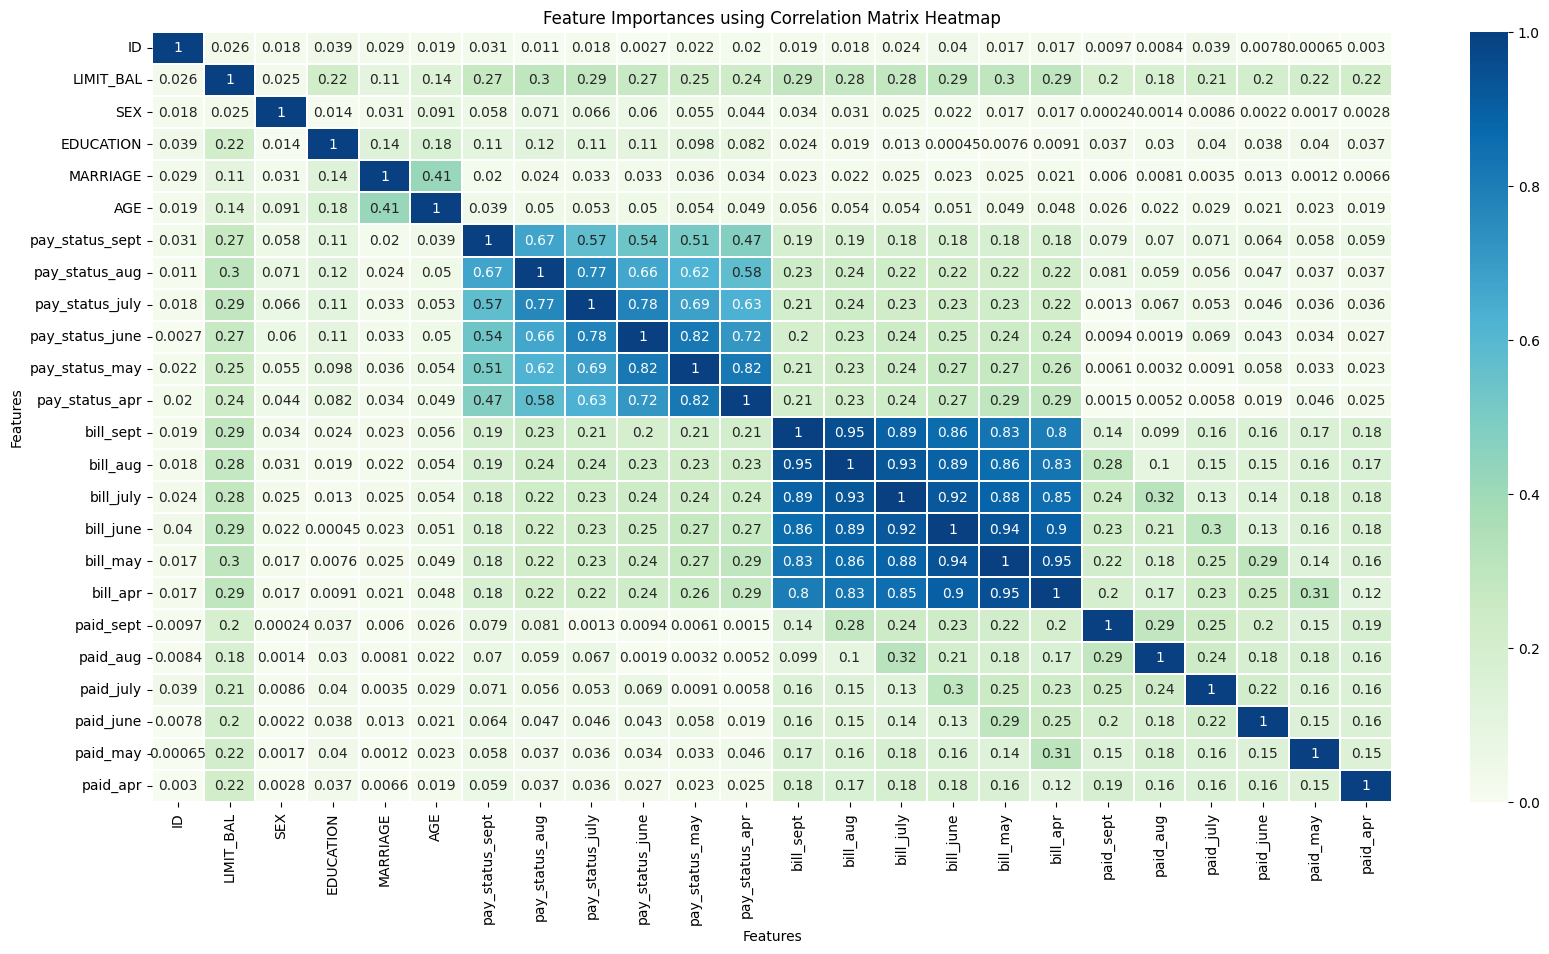

In [ ]:
data_copy = data.copy()
# Exclude the target variable from the correlation matrix
corr_matrix = data_copy.drop(columns=['default']).corr().abs()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu', linewidths=0.2, vmin=0, vmax=1)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Importances using Correlation Matrix Heatmap')
plt.show()

In [ ]:
#customer_id makes least sense for predicting output, hence drop it
data.drop('ID',axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LIMIT_BAL        30000 non-null  float64
 1   SEX              30000 non-null  int64  
 2   EDUCATION        30000 non-null  int64  
 3   MARRIAGE         30000 non-null  int64  
 4   AGE              30000 non-null  int64  
 5   pay_status_sept  30000 non-null  int64  
 6   pay_status_aug   30000 non-null  int64  
 7   pay_status_july  30000 non-null  int64  
 8   pay_status_june  30000 non-null  int64  
 9   pay_status_may   30000 non-null  int64  
 10  pay_status_apr   30000 non-null  int64  
 11  bill_sept        30000 non-null  float64
 12  bill_aug         30000 non-null  float64
 13  bill_july        30000 non-null  float64
 14  bill_june        30000 non-null  float64
 15  bill_may         30000 non-null  float64
 16  bill_apr         30000 non-null  float64
 17  paid_sept   

<Axes: xlabel='SEX', ylabel='count'>

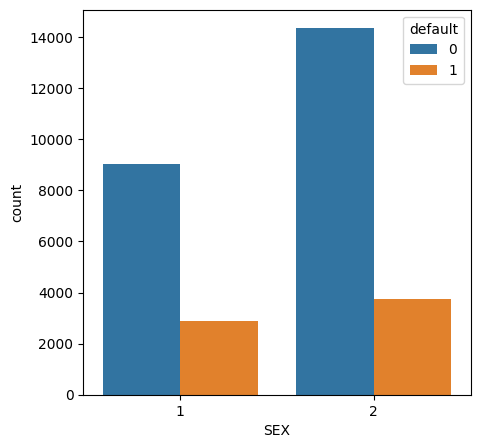

In [ ]:
#count plot for sex and with respect to target
fig, axes = plt.subplots(figsize=(5,5))
sns.countplot(x = 'SEX', hue = 'default', data = data)

In [ ]:
if (data['LIMIT_BAL'] < 0).any():
    print("There are values in 'limit_bal' less than 0.")
else:
    print("All values in 'limit_bal' are greater than or equal to 0.")

All values in 'limit_bal' are greater than or equal to 0.


<Axes: xlabel='EDUCATION', ylabel='count'>

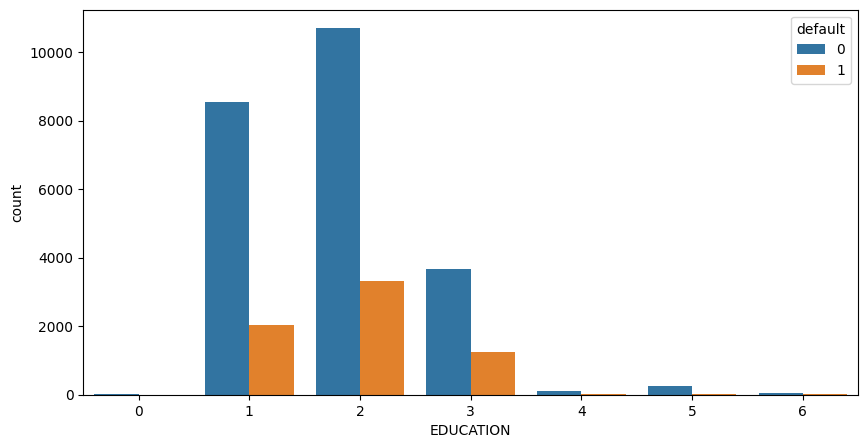

In [ ]:
#count plot for education and with respect to target
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(x = 'EDUCATION', hue = 'default', data = data)

In [ ]:
#replacing unnecessary values with 4(others category)
unnecessary = (data['EDUCATION'] == 0) | (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6)
data.loc[unnecessary, 'EDUCATION'] = 4
data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

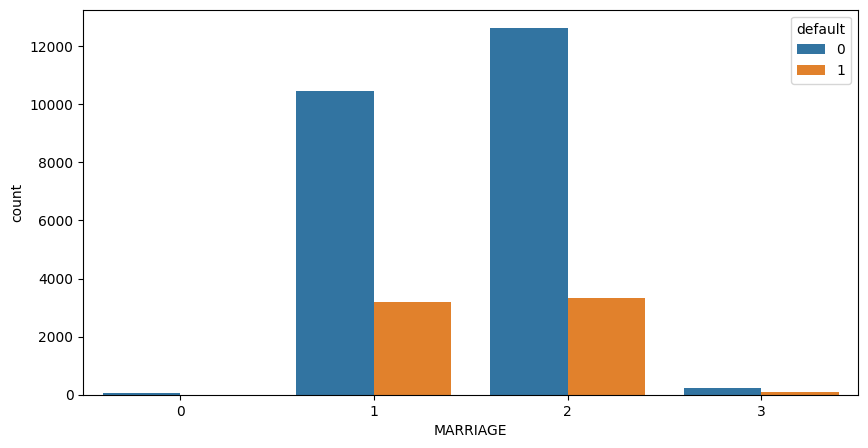

In [ ]:
#count plot for marriage and with respect to target
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', hue = 'default', data = data)

In [ ]:
##replacing unnecessary values with 3(others category)
unnecessary = (data['MARRIAGE'] == 0)
data.loc[unnecessary, 'MARRIAGE'] = 3
data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

'sex', 'education level', and 'marital status', are represented as categories, which cannot be directly used as input to algorithms. We can use One-hot encoding that will preserve the information contained in categorical variables without imposing ordinality.

One hot Encoding

In [ ]:
# Map numerical values to corresponding categories
data['SEX'] = data['SEX'].map({1: 'male', 2: 'female'})
data['EDUCATION'] = data['EDUCATION'].map({1:'grad_schl', 2:'uni', 3:'high_schl', 4:'others'})
data['MARRIAGE'] = data['MARRIAGE'].map({1:'married', 2:'single', 3:'others'})
data = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

In [ ]:
data = data.drop(columns = ['EDUCATION_others', 'MARRIAGE_others'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LIMIT_BAL            30000 non-null  float64
 1   AGE                  30000 non-null  int64  
 2   pay_status_sept      30000 non-null  int64  
 3   pay_status_aug       30000 non-null  int64  
 4   pay_status_july      30000 non-null  int64  
 5   pay_status_june      30000 non-null  int64  
 6   pay_status_may       30000 non-null  int64  
 7   pay_status_apr       30000 non-null  int64  
 8   bill_sept            30000 non-null  float64
 9   bill_aug             30000 non-null  float64
 10  bill_july            30000 non-null  float64
 11  bill_june            30000 non-null  float64
 12  bill_may             30000 non-null  float64
 13  bill_apr             30000 non-null  float64
 14  paid_sept            30000 non-null  float64
 15  paid_aug             30000 non-null 

<Axes: xlabel='AGE', ylabel='count'>

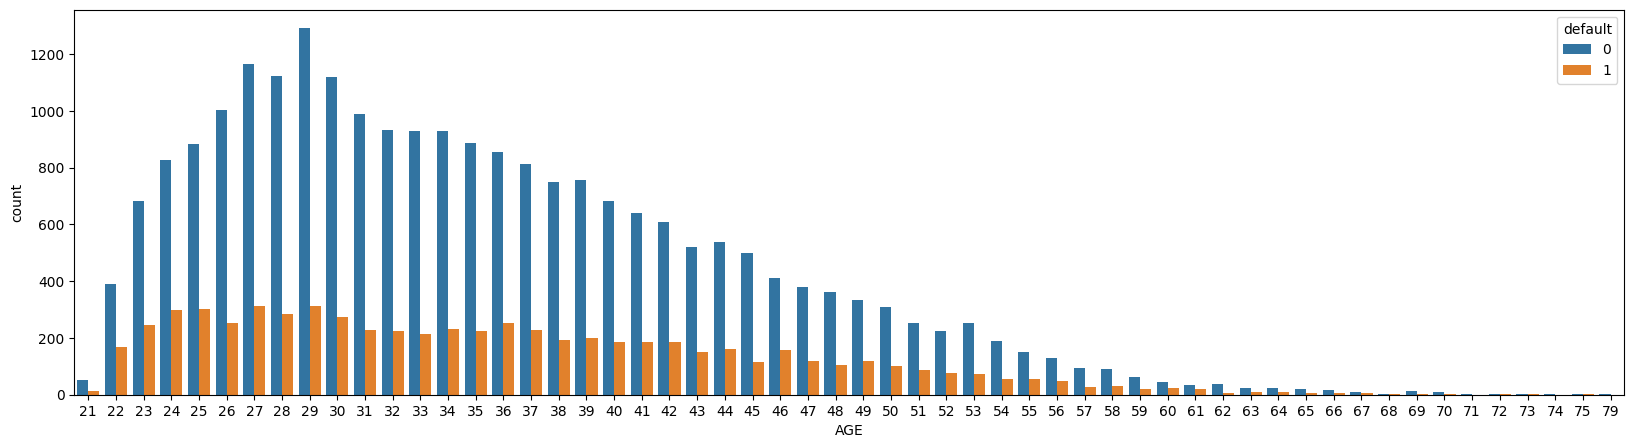

In [ ]:
#count plot for age and with respect to target
plt.figure(figsize=(20,5))
sns.countplot(x = 'AGE', hue = 'default', data = data)

In [ ]:
data['pay_status_apr'].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

In [ ]:
columns_to_replace = ['pay_status_sept', 'pay_status_aug', 'pay_status_july',
                      'pay_status_june', 'pay_status_may', 'pay_status_apr']

# Replace values 0 or -2 with -1
data[columns_to_replace] = data[columns_to_replace].replace({0: -1, -2: -1})

Feature Engineering

In [ ]:
#payment_status will give us an idea if customer's payments are delayed or not
data['payment_status'] = data['pay_status_sept'] + data['pay_status_aug'] + data['pay_status_july'] + data['pay_status_june'] + data['pay_status_may'] + data['pay_status_apr']
#payment_due tells us how much amount is left to be paid. This column gives us an idea of financial status of customer
data['payment_due'] = (data['bill_sept']+data['bill_aug']+data['bill_july']+data['bill_june']+data['bill_may']+data['bill_apr'])-(data['paid_sept']+data['paid_aug']+data['paid_july']+data['paid_june']+data['paid_may']+data['paid_apr'])

# utilization_ratio denotes ratio of credit utilized to the balance limit.
data['utilization_ratio'] = data[['bill_sept', 'bill_aug', 'bill_july', 'bill_june',
       'bill_may', 'bill_apr']].sum(axis=1)/data['LIMIT_BAL']

#check for outlier
df_filtered = data[(data['payment_status'] <= 0) & (data['default'] == 'Yes')]
print(df_filtered)

Empty DataFrame
Columns: [LIMIT_BAL, AGE, pay_status_sept, pay_status_aug, pay_status_july, pay_status_june, pay_status_may, pay_status_apr, bill_sept, bill_aug, bill_july, bill_june, bill_may, bill_apr, paid_sept, paid_aug, paid_july, paid_june, paid_may, paid_apr, default, SEX_female, SEX_male, EDUCATION_grad_schl, EDUCATION_high_schl, EDUCATION_uni, MARRIAGE_married, MARRIAGE_single, payment_status, payment_due, utilization_ratio]
Index: []

[0 rows x 31 columns]


In [ ]:
#one hot encoding by droping first variable
data = pd.get_dummies(data, columns=['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_apr'], drop_first = True )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LIMIT_BAL            30000 non-null  float64
 1   AGE                  30000 non-null  int64  
 2   bill_sept            30000 non-null  float64
 3   bill_aug             30000 non-null  float64
 4   bill_july            30000 non-null  float64
 5   bill_june            30000 non-null  float64
 6   bill_may             30000 non-null  float64
 7   bill_apr             30000 non-null  float64
 8   paid_sept            30000 non-null  float64
 9   paid_aug             30000 non-null  float64
 10  paid_july            30000 non-null  float64
 11  paid_june            30000 non-null  float64
 12  paid_may             30000 non-null  float64
 13  paid_apr             30000 non-null  float64
 14  default              30000 non-null  int64  
 15  SEX_female           30000 non-null 

In [ ]:
# Filter out rows where bill_sept is negative and default_oct is "Yes" to check outlier
df_filtered = data[(data['bill_sept'] >= 0) & (data['default'] == 'Yes')]
print(df_filtered)

Empty DataFrame
Columns: [LIMIT_BAL, AGE, bill_sept, bill_aug, bill_july, bill_june, bill_may, bill_apr, paid_sept, paid_aug, paid_july, paid_june, paid_may, paid_apr, default, SEX_female, SEX_male, EDUCATION_grad_schl, EDUCATION_high_schl, EDUCATION_uni, MARRIAGE_married, MARRIAGE_single, payment_status, payment_due, utilization_ratio, pay_status_sept_1, pay_status_sept_2, pay_status_sept_3, pay_status_sept_4, pay_status_sept_5, pay_status_sept_6, pay_status_sept_7, pay_status_sept_8, pay_status_aug_1, pay_status_aug_2, pay_status_aug_3, pay_status_aug_4, pay_status_aug_5, pay_status_aug_6, pay_status_aug_7, pay_status_aug_8, pay_status_july_1, pay_status_july_2, pay_status_july_3, pay_status_july_4, pay_status_july_5, pay_status_july_6, pay_status_july_7, pay_status_july_8, pay_status_june_1, pay_status_june_2, pay_status_june_3, pay_status_june_4, pay_status_june_5, pay_status_june_6, pay_status_june_7, pay_status_june_8, pay_status_may_2, pay_status_may_3, pay_status_may_4, pay_sta

<Axes: xlabel='default', ylabel='count'>

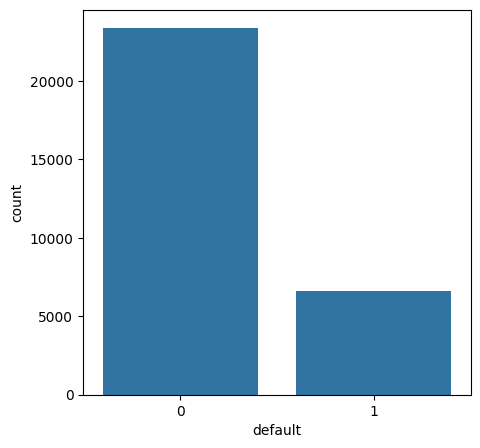

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'default', data = data)

Here we can observe that 'no' (0) class has comparatively higher number of samples than 'yes' (1) class which makes it imbalanced. Applying imbalanced target class to model may result in poor results, so we can use SMOTE (Synthetic Minority Oversampling Technique) to make our classes balanced.

In [ ]:
#rearrange columns
data = data[[col for col in data if col != 'default'] + ['default']]
data.columns

Index(['LIMIT_BAL', 'AGE', 'bill_sept', 'bill_aug', 'bill_july', 'bill_june',
       'bill_may', 'bill_apr', 'paid_sept', 'paid_aug', 'paid_july',
       'paid_june', 'paid_may', 'paid_apr', 'SEX_female', 'SEX_male',
       'EDUCATION_grad_schl', 'EDUCATION_high_schl', 'EDUCATION_uni',
       'MARRIAGE_married', 'MARRIAGE_single', 'payment_status', 'payment_due',
       'utilization_ratio', 'pay_status_sept_1', 'pay_status_sept_2',
       'pay_status_sept_3', 'pay_status_sept_4', 'pay_status_sept_5',
       'pay_status_sept_6', 'pay_status_sept_7', 'pay_status_sept_8',
       'pay_status_aug_1', 'pay_status_aug_2', 'pay_status_aug_3',
       'pay_status_aug_4', 'pay_status_aug_5', 'pay_status_aug_6',
       'pay_status_aug_7', 'pay_status_aug_8', 'pay_status_july_1',
       'pay_status_july_2', 'pay_status_july_3', 'pay_status_july_4',
       'pay_status_july_5', 'pay_status_july_6', 'pay_status_july_7',
       'pay_status_july_8', 'pay_status_june_1', 'pay_status_june_2',
       'pay_

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit features and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['default'])
print(pd.Series(y_smote).value_counts())

default
1    23364
0    23364
Name: count, dtype: int64


In [ ]:
#creating new dataframe from balanced dataset after SMOTE
smote_df = pd.DataFrame(x_smote, columns=list(i for i in list(data.describe(include='all').columns) if i != 'default'))
smote_df['default'] = y_smote

<Axes: xlabel='default', ylabel='count'>

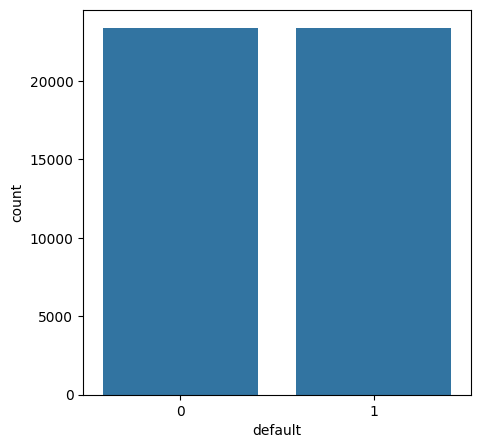

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'default', data = smote_df)

Implementing Algos

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from google.colab import files
smote_df.to_csv('Final_columns.csv')
files.download('Final_columns.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('Final_columns.csv')

In [ ]:
df.head()

,Unnamed: 0,LIMIT_BAL,AGE,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_apr,paid_sept,...,pay_status_may_7,pay_status_may_8,pay_status_apr_2,pay_status_apr_3,pay_status_apr_4,pay_status_apr_5,pay_status_apr_6,pay_status_apr_7,pay_status_apr_8,default
0,0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1
1,1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,False,False,True,False,False,False,False,False,False,1
2,2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,False,False,False,False,False,False,False,False,False,0
3,3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,False,False,False,False,False,False,False,False,False,0
4,4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)
df.head()

,LIMIT_BAL,AGE,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_apr,paid_sept,paid_aug,...,pay_status_may_7,pay_status_may_8,pay_status_apr_2,pay_status_apr_3,pay_status_apr_4,pay_status_apr_5,pay_status_apr_6,pay_status_apr_7,pay_status_apr_8,default
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,False,False,False,False,False,False,False,False,False,1
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,False,False,True,False,False,False,False,False,False,1
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,False,False,False,False,False,False,False,False,False,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,False,False,False,False,False,False,False,False,False,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'LIMIT_BAL', 'AGE', 'bill_sept', 'bill_aug', 'bill_july',
       'bill_june', 'bill_may', 'bill_apr', 'paid_sept', 'paid_aug',
       'paid_july', 'paid_june', 'paid_may', 'paid_apr', 'SEX_female',
       'SEX_male', 'EDUCATION_grad_schl', 'EDUCATION_high_schl',
       'EDUCATION_uni', 'MARRIAGE_married', 'MARRIAGE_single',
       'payment_status', 'payment_due', 'utilization_ratio',
       'pay_status_sept_1', 'pay_status_sept_2', 'pay_status_sept_3',
       'pay_status_sept_4', 'pay_status_sept_5', 'pay_status_sept_6',
       'pay_status_sept_7', 'pay_status_sept_8', 'pay_status_aug_1',
       'pay_status_aug_2', 'pay_status_aug_3', 'pay_status_aug_4',
       'pay_status_aug_5', 'pay_status_aug_6', 'pay_status_aug_7',
       'pay_status_aug_8', 'pay_status_july_1', 'pay_status_july_2',
       'pay_status_july_3', 'pay_status_july_4', 'pay_status_july_5',
       'pay_status_july_6', 'pay_status_july_7', 'pay_status_july_8',
       'pay_status_june_1', 'pay_status_

In [ ]:
# Assign features to x
x = df.iloc[:, :-1]

# Assign target variable to y
y = df.iloc[:, -1]


Logistic Regression

In [ ]:
data_log_reg = x.copy()
X = data_log_reg.drop(['payment_status','payment_due'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_log_reg.fit(X_train, Y_train)
optimized_lr = grid_log_reg.best_estimator_

print(grid_log_reg.best_params_)

# Get the predicted classes
train_pred = optimized_lr.predict(X_train)
test_pred = optimized_lr.predict(X_test)
# Get the accuracy scores
train_accuracy = accuracy_score(train_pred,Y_train)
test_accuracy = accuracy_score(test_pred,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, test_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, test_pred))


Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'C': 1000, 'penalty': 'l2'}
The accuracy on train data is  0.8652292547215237
The accuracy on test data is  0.8708538412154933

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.93      0.80      0.86      4673

    accuracy                           0.87      9346
   macro avg       0.88      0.87      0.87      9346
weighted avg       0.88      0.87      0.87      9346


Confusion Matrix:
[[4391  282]
 [ 925 3748]]


Decision Tree

In [ ]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)
grid_dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_dt_clf.fit(X_train, Y_train)
optimal_dt_clf = grid_dt_clf.best_estimator_

print(grid_dt_clf.best_params_)

# Get the predicted classes
train_dt_pred = optimal_dt_clf.predict(X_train)
test_dt_pred = optimal_dt_clf.predict(X_test)
# Get the accuracy scores
train_dt_accuracy = accuracy_score(train_dt_pred,Y_train)
test_dt_accuracy = accuracy_score(test_dt_pred,Y_test)

print("The accuracy on train data is ", train_dt_accuracy)
print("The accuracy on test data is ", test_dt_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, test_dt_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, test_dt_pred))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'max_depth': 20, 'min_samples_split': 0.1}
The accuracy on train data is  0.7883205820983361
The accuracy on test data is  0.7971324630858121

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4673
           1       0.81      0.77      0.79      4673

    accuracy                           0.80      9346
   macro avg       0.80      0.80      0.80      9346
weighted avg       0.80      0.80      0.80      9346


Confusion Matrix:
[[3833  840]
 [1056 3617]]


Random Forest using GridSearch CV

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(x_train, y_train)
optimal_rf_clf = grid_rf_clf.best_estimator_

print(grid_rf_clf.best_params_)

# Get the predicted classes
train_rf_pred = optimal_rf_clf.predict(x_train)
test_rf_pred = optimal_rf_clf.predict(x_test)
# Get the accuracy scores
train_rf_accuracy = accuracy_score(train_rf_pred,y_train)
test_rf_accuracy = accuracy_score(test_rf_pred,y_test)

print("The accuracy on train data is ", train_rf_accuracy)
print("The accuracy on test data is ", test_rf_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, test_rf_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_rf_pred))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 30, 'n_estimators': 100}
The accuracy on train data is  0.9994917339896207
The accuracy on test data is  0.8797346458377916

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4664
           1       0.90      0.85      0.88      4682

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346


Confusion Matrix:
[[4245  419]
 [ 705 3977]]


Evaluating different models

In [ ]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest CLf']
train_accuracy = [train_accuracy_lr, train_accuracy_dt, train_rf_accuracy]
test_accuracy = [test_accuracy_lr, train_accuracy_dt, test_rf_accuracy]
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy })

,Classifier,Train Accuracy,Test Accuracy
0,Logistic Regression,0.865176,0.870854
1,Decision Tree,0.788321,0.788321
2,Random Forest CLf,0.999492,0.879735


Roc Curve

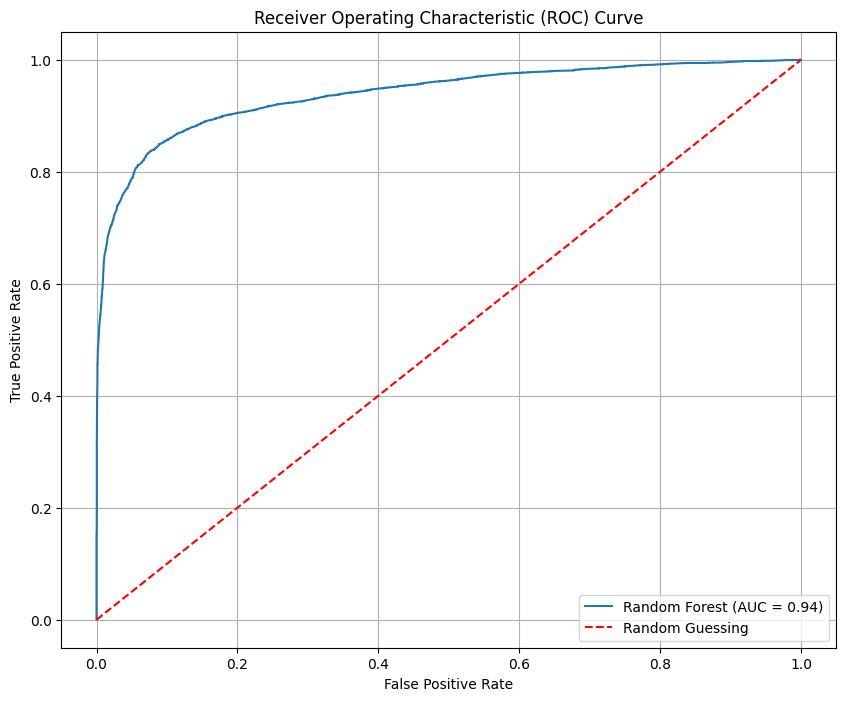

Random Forest: AUC = 0.94


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define models and their names
models = [optimal_rf_clf]
model_names = ['Random Forest']

# Initialize lists to store AUC values
auc_values = []

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    # Predict probabilities
    y_prob = model.predict_proba(x_test)[:, 1]

    # Calculate false positive rate, true positive rate, and threshold
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Calculate AUC
    auc_value = auc(fpr, tpr)
    auc_values.append(auc_value)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_value:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC values
for name, auc_value in zip(model_names, auc_values):
    print(f'{name}: AUC = {auc_value:.2f}')


Dump the Random Forest Model

In [ ]:
import pickle
pickle.dump(optimal_rf_clf, open('model.pkl', 'wb'))